In [1]:
import math as m
import random as rd
import matplotlib.pyplot as plt

In [2]:
c_centre = [1, 1]
rayon = 1.0

# Aires théoriques (cercle unité dans carré 2x2)
s_cercle = m.pi
s_out = 4 - m.pi
s_ratio = round(s_cercle / s_out, 4)
print("ratio théorique s_cercle/s_out =", s_ratio)

ratio théorique s_cercle/s_out = 3.6598


In [3]:
while True:
    try:
        d = int(input("Nombre de points (entier) : "))
        if d <= 0:
            print("Donne un entier > 0.")
            continue
        break
    except ValueError:
        print("Entrée invalide. Donne un entier.")

In [4]:
xs_in, ys_in = [], []
xs_out, ys_out = [], []

n_in = 0
for _ in range(d):
    x = rd.uniform(0, 2)
    y = rd.uniform(0, 2)
    if (x - c_centre[0]) ** 2 + (y - c_centre[1]) ** 2 <= rayon ** 2:
        n_in += 1
        xs_in.append(x)
        ys_in.append(y)
    else:
        xs_out.append(x)
        ys_out.append(y)

n_out = d - n_in
print("n_in  =", n_in)
print("n_out =", n_out)

# Ratio Monte Carlo
if n_out > 0:
    n_ratio = round(n_in / n_out, 4)
    print("ratio expérimental n_in/n_out =", n_ratio)
else:
    print("Tous les points sont dans le cercle. ratio n_in/n_out non défini.")

n_in  = 797
n_out = 203
ratio expérimental n_in/n_out = 3.9261


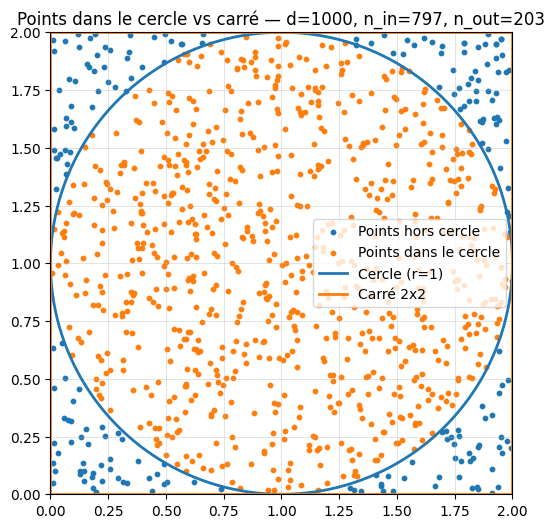

In [5]:
fig = plt.figure(figsize=(6, 6))

# Points
plt.scatter(xs_out, ys_out, s=10, label="Points hors cercle")
plt.scatter(xs_in, ys_in, s=10, label="Points dans le cercle")

# Cercle
theta = [t * m.tau / 360 for t in range(361)]
xc = [c_centre[0] + rayon * m.cos(t) for t in theta]
yc = [c_centre[1] + rayon * m.sin(t) for t in theta]
plt.plot(xc, yc, linewidth=2, label="Cercle (r=1)")

# Carré englobant [0,2]x[0,2]
plt.plot([0, 2, 2, 0, 0], [0, 0, 2, 2, 0], linewidth=2, label="Carré 2x2")

plt.xlim(0, 2)
plt.ylim(0, 2)
plt.gca().set_aspect("equal", adjustable="box")
plt.grid(True, linewidth=0.5, alpha=0.5)
plt.legend()
plt.title(f"Points dans le cercle vs carré — d={d}, n_in={n_in}, n_out={n_out}")

plt.show()